In [ ]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.utils import to_categorical

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Classifying
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     )
# datagen.fit(train_images)

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 15:
        lrate = 0.0005
    if epoch > 30:
        lrate = 0.0001
    if epoch > 45:
        lrate = 0.00005
    return lrate

checkpoint = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
# 5번의 연속적인 epoch 동안 개선이 없을 때 학습이 중단되도록 함
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [ ]:
from keras.callbacks import LearningRateScheduler

history = model.fit(train_images, train_labels, batch_size=128, epochs=60,  validation_split=0.1,
                    callbacks = [checkpoint, early_stopping, LearningRateScheduler(lr_schedule)])

Epoch 1/100
352/352 [==============================] - 373s 1s/step - loss: 1.7552 - acc: 0.3760 - val_loss: 3.0033 - val_acc: 0.2368 - lr: 0.0010
Epoch 2/100
352/352 [==============================] - 339s 964ms/step - loss: 1.3304 - acc: 0.5207 - val_loss: 1.0758 - val_acc: 0.6158 - lr: 0.0010
Epoch 3/100
352/352 [==============================] - 345s 979ms/step - loss: 1.1143 - acc: 0.6060 - val_loss: 1.0210 - val_acc: 0.6524 - lr: 0.0010
Epoch 4/100
352/352 [==============================] - 341s 969ms/step - loss: 0.9906 - acc: 0.6532 - val_loss: 1.2350 - val_acc: 0.5928 - lr: 0.0010
Epoch 5/100
352/352 [==============================] - 342s 972ms/step - loss: 0.8880 - acc: 0.6913 - val_loss: 0.8742 - val_acc: 0.7112 - lr: 0.0010
Epoch 6/100
352/352 [==============================] - 341s 967ms/step - loss: 0.8319 - acc: 0.7078 - val_loss: 0.7672 - val_acc: 0.7388 - lr: 0.0010
Epoch 7/100
352/352 [==============================] - 342s 972ms/step - loss: 0.7730 - acc: 0.7306 - v

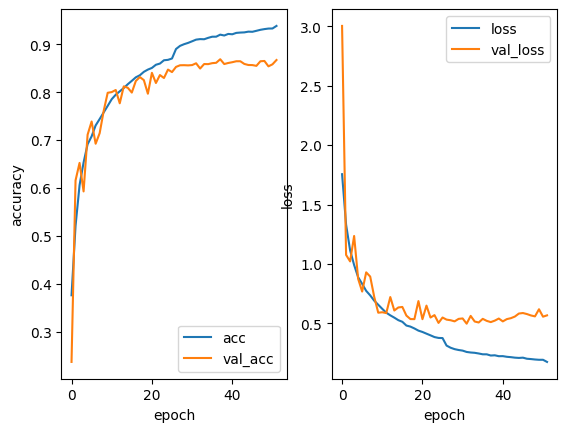

313/313 - 18s - loss: 0.5456 - acc: 0.8470 - 18s/epoch - 57ms/step


In [ ]:
import matplotlib.pyplot as plt

plt.figure()

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')

plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)